In [1]:
#图像相关层：主要包括正逆卷积、多种池化

RGB


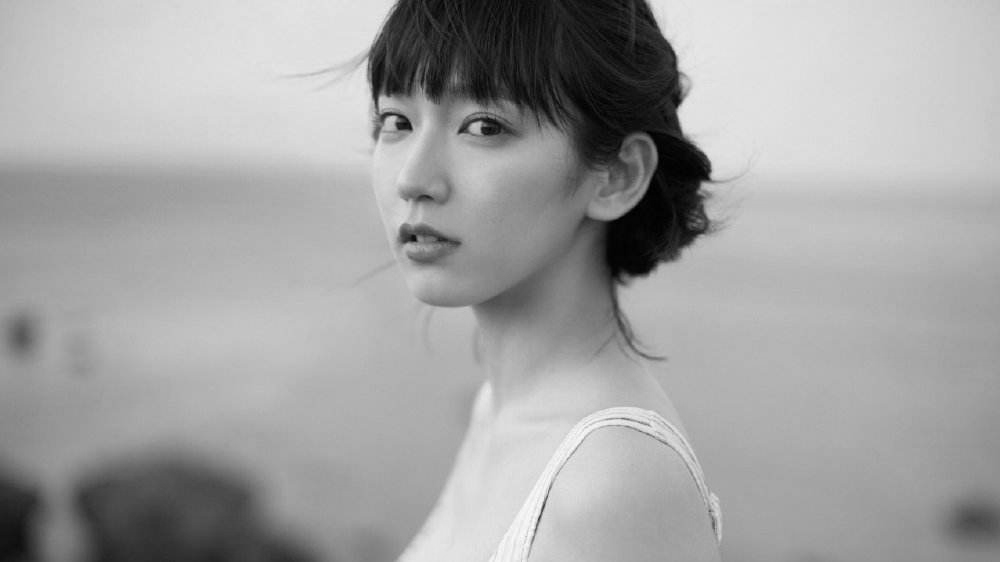

In [40]:
import torch as t
import torch.nn as nn
from torch.autograd import variable as var
from PIL import Image
from torchvision.transforms import ToTensor,ToPILImage
to_tensor = ToTensor() #img --> Tensor
to_pil = ToPILImage()
pic = Image.open('pic.jpg')
print(pic.mode)
pic = pic.convert('L')
pic

tensor([[-0.1111, -0.1111, -0.1111],
        [-0.1111,  1.0000, -0.1111],
        [-0.1111, -0.1111, -0.1111]])


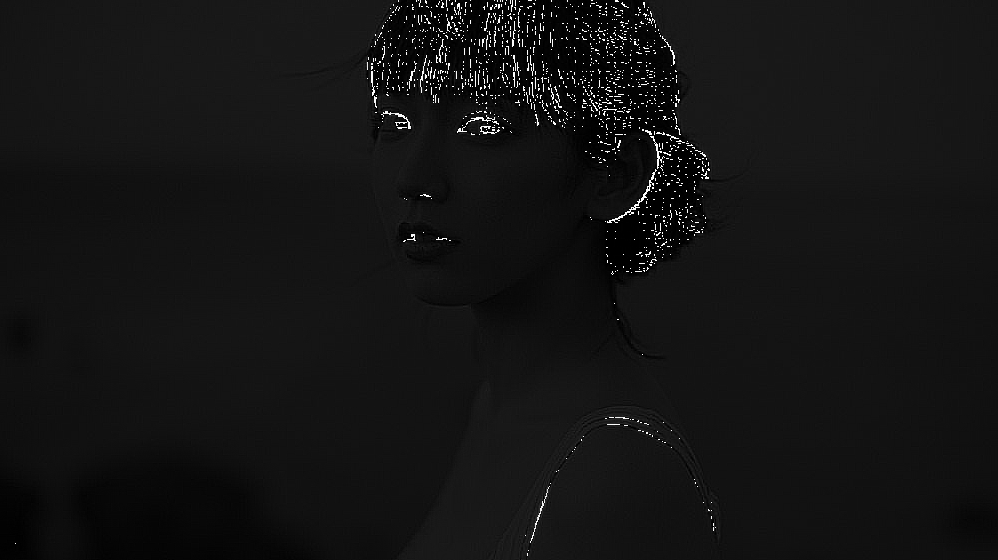

In [14]:
#输入的是一个batch，且size为1
inputs = to_tensor(pic).unsqueeze(0)

#锐化卷积内核
kernel = t.ones(3,3)/-9.
kernel[1][1] =1
print(kernel)
 

conv = nn.Conv2d(1,1,(3,3),1,bias=False)
conv.weight.data = kernel.view(1,1,3,3)

output = conv(var(inputs)) 
to_pil(output.data.squeeze(0))

In [22]:
#池化层没有参数
pool = nn.AvgPool2d(2,2)
list(pool.parameters())

[]

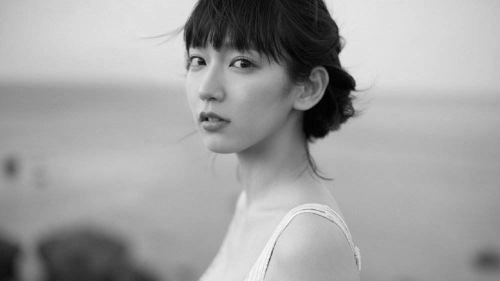

In [25]:
out = pool(var(inputs))
to_pil(out.data.squeeze(0))

In [31]:
#除此之外还有全连接层Linear，vatchNorm,Dropout层
#以下为相关例子
inputs = var(t.randn(2,3))
linear = nn.Linear(3,4)
out = linear(inputs)
out

tensor([[ 0.1597,  0.8792,  1.0094, -0.4366],
        [ 0.8945, -0.2191,  0.9472,  0.2423]], grad_fn=<AddmmBackward>)

In [35]:
#4 通道，标准差为4，均值为0
bn = nn.BatchNorm1d(4)
bn.weight.data = t.ones(4)*4
bn.bias.data = t.zeros(4)

bn_out = bn(out)

drop = nn.Dropout(0.5)
o = drop(bn_out)

In [43]:
#激活函数ReLu,inplace会覆盖原来的参数，节省空间
relu = nn.ReLU(inplace=True)
inputs = var(t.randn(2,3))
print(inputs)
output = relu(inputs)
print(output)

tensor([[-0.3488,  0.0161,  0.1796],
        [-0.7194, -0.3221, -0.4759]])
tensor([[0.0000, 0.0161, 0.1796],
        [0.0000, 0.0000, 0.0000]])


In [51]:
#除了手写之外，对于纯前馈网络来说还可以用ModuleList 和sequential来表示
#以表示sequential的三种写法,还有一种就算了
net1 = nn.Sequential()
net1.add_module('conv',nn.Conv2d(3,3,3))
net1.add_module('batchnorm',nn.BatchNorm2d(3))
net1.add_module('activation_layer',nn.ReLU())

net2 = nn.Sequential(
        nn.Conv2d(3,3,3),
        nn.BatchNorm2d(3),
        nn.ReLU()
        )

print("net1:",net1)
print("net2:",net2)

net1: Sequential(
  (conv): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activation_layer): ReLU()
)
net2: Sequential(
  (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
)
